# 8.9.1 近接勾配法と加速付き近接勾配法のサンプルコード

In [1]:
import numpy as np

### コード8.5 ■ Lasso を解くコード

In [2]:
from code8_1 import * # 定数ステップ幅を用いた近接勾配法 ProximalGradient_constのコードを読み込み
from code8_2 import * # 近接勾配法(バックトラッキング) ProximalGradient_backtrack のコードを読み込み
from code8_3 import * # FISTA のコードを読み込み
from code8_4 import * #ソフト閾値関数 soft_thresholding のコードを読み込み

In [3]:
# データの生成
np.random.seed(0) # 乱数のシードを固定
n, m = 1000, 1000
A = np.random.randn(m, n)
b = np.random.randn(m)
C = 10
def LS(x): # 線形最小二乗の目的関数
    Axb = A@x - b
    return Axb@Axb/2
def nab_LS(x): # 勾配
    Axb = A@x - b
    return A.T@Axb
l1 = lambda x: C*np.linalg.norm(x,1) # l1正則化 C||x||_1
eig, eigv = np.linalg.eig(A.T@A) # 固有値と固有ベクトルを計算
L = np.max(eig) # 最大固有値を取得
x_0 = np.zeros(n) # ゼロベクトルを初期点にする

x_PG = ProximalGradient_const(LS, nab_LS, l1, soft_thresholding, C, x_0, 1/L)
x_PG_Back = ProximalGradient_backtrack(LS, nab_LS, l1, soft_thresholding, C, x_0)
x_FISTA = FISTA(LS, nab_LS, l1, soft_thresholding, C, x_0, 1/L)

PGM with const.:反復回数362, 最適値2.65215e+02
PGM with backtracking.:反復回数204, 最適値2.65215e+02
FISTA: 反復回数360, 最適値2.65215e+02


### 図8.5 ■ 各反復における誤差の比較

In [4]:
from code8_1v2 import * # 定数ステップ幅を用いた近接勾配法 ProximalGradient_constのコードを読み込み（点列のログを残すバージョン）
from code8_2v2 import * # 近接勾配法(バックトラッキング) ProximalGradient_backtrack のコードを読み込み（点列のログを残すバージョン）
from code8_3v2 import * # FISTA のコードを読み込み（点列のログを残すバージョン）
from code8_4 import * #ソフト閾値関数 soft_thresholding のコードを読み込み

/var/folders/3f/dc64r2390y53mf9bwp2cxw7c0000gn/T/ipykernel_23598/367971530.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(5.e-5,0)


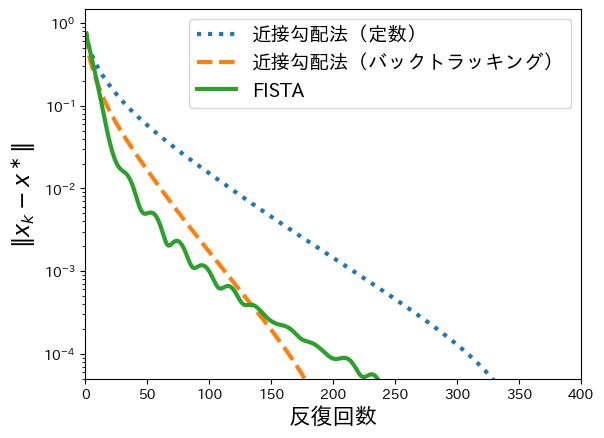

In [5]:
import matplotlib.pyplot as plt
import japanize_matplotlib 
eps = 1.e-6
seq_PG = ProximalGradient_const(LS, nab_LS, l1, soft_thresholding, C, x_0, 1/L, eps = eps)
seq_PG_Back = ProximalGradient_backtrack(LS, nab_LS, l1, soft_thresholding, C, x_0, eps = eps)
seq_FISTA = FISTA(LS, nab_LS, l1, soft_thresholding, C, x_0, 1/L, eps = eps)
# 各反復における誤差を計算
err_PG = np.linalg.norm(seq_PG - seq_PG[-1], axis=1)
err_PG_Back = np.linalg.norm(seq_PG_Back - seq_PG_Back[-1], axis=1)
err_FISTA  = np.linalg.norm(seq_FISTA - seq_FISTA[-1], axis=1)
# 縦軸を対数表記でプロット
ax_iter = np.arange(1, len(err_PG) + 1)
plt.semilogy(ax_iter, err_PG, linestyle=':', linewidth = 3, label='近接勾配法（定数）')
ax_iter = np.arange(1, len(err_PG_Back) + 1)
plt.semilogy(ax_iter, err_PG_Back, linestyle='--', linewidth = 3, label='近接勾配法（バックトラッキング）')
ax_iter = np.arange(1, len(err_FISTA) + 1)
plt.semilogy(ax_iter, err_FISTA, linestyle='-',  linewidth = 3, label='FISTA')
# 軸ラベルとタイトル
plt.xlabel(r'反復回数', fontsize=16)
plt.ylabel(r'$\|x_k-x^\ast\|$', fontsize=16)
# plt.title('各反復における誤算', fontsize=16)
plt.legend()
plt.ylim(5.e-5,0)
plt.xlim(0,400)
plt.legend(fontsize=14)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show() # プロットを表示